# Learning Objectives
- [Example1: A Step-by-Step Illustration of Hierarhical Clustering](#Example1:-A-Step-by-Step-Illustration-of-Hierarhical-Clustering)
  - [Step1: Creating Input Dataset](#Step1:-Creating-Input-Dataset)
  - [Step2: Distance Matrix Calculation](#Step2:-Distance-Matrix-Calculation)
  - [Step3: Clustering using Linkage Policy](#Step3:-Clustering-using-Linkage-Policy)
  - [Step4: Visualize the dendrogram (i.e., agglomoerating process)](#Step4:-Visualize-the-dendrogram-(i.e.,-agglomoerating-process))
- [Example2: Comparison of Inter-Cluster Distances in Hiararchical Clustering](#Example2:-Comparison-of-Inter-Cluster-Distances-in-Hiararchical-Clustering)
  - [Step1: Load Example Data](#Step1:-Load-Example-Data)
  - [Step2: Linkage Policies: Single Link, Complete Link, Average Link, Ward](#Step2:-Linkage-Policies:-Single-Link,-Complete-Link,-Average-Link,-Ward)
  - [Step3: Visualize the dendrogram (i.e., agglomoerating process)](#Step3:-Visualize-the-dendrogram-(i.e.,-agglomoerating-process))


#### Adapted from 
* https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html
* https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-download-auto-examples-cluster-plot-agglomerative-dendrogram-py
* Python Machine Learning 3rd Edition by Sebastian Raschka, Packt Publishing Ltd. 2019
* Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition

# Example1: A Step-by-Step Illustration of Hierarhical Clustering

In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering 
import matplotlib.pyplot as plt
# import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

%matplotlib inline



### Step1: Creating Input Dataset

In [2]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### Step2: Distance Matrix Calculation

In [3]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


### Step3: Clustering using Linkage Policy
We can either pass a condensed distance matrix (upper triangular) from the pdist function, or we can pass the "original" data array and define the metric='euclidean' argument in linkage. However, we should not pass the squareform distance matrix, which would yield different distance values although the overall clustering could be the same.

In [4]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


### Step4: Visualize the dendrogram (i.e., agglomoerating process)

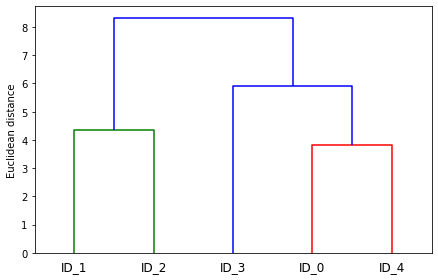

In [5]:
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

# Example2: Comparison of Inter-Cluster Distances in Hiararchical Clustering

In [6]:
# Visualize the clustering
digits = datasets.load_digits()
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in digits.target_names:
        plt.scatter(
            *X_red[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Step1: Load Example Data

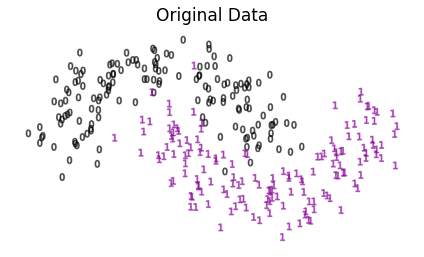

In [7]:
X_varied, y = datasets.make_moons(n_samples=300, noise=0.2, random_state=1) 
plot_clustering(X_varied, y, "Original Data") 

In [8]:
df = pd.DataFrame(X_varied, columns=['feature_1','feature_2'])
df.head()

,feature_1,feature_2
0,0.210735,-0.015987
1,-0.829104,0.651878
2,0.242325,0.007396
3,1.040394,-0.427211
4,-0.633120,0.419838


### Step2: Linkage Policies: Single Link, Complete Link, Average Link, Ward

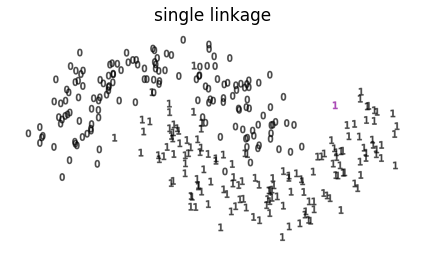

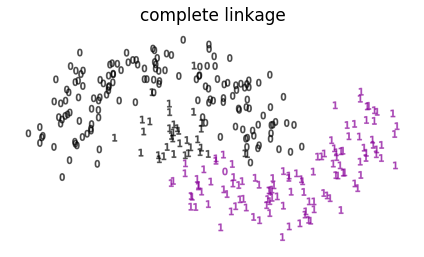

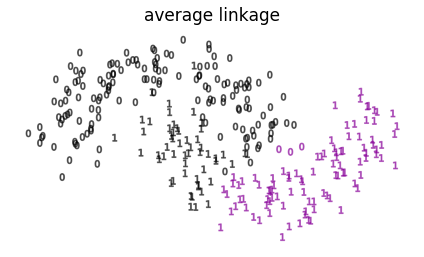

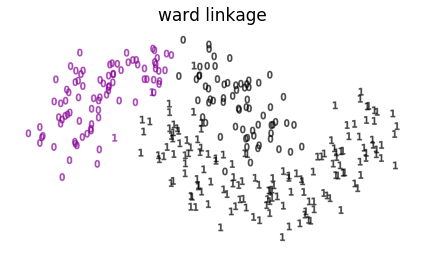

In [9]:
for policy in ("single", "complete", "average", "ward"):
    clustering = AgglomerativeClustering(linkage=policy, n_clusters=2)
    clustering.fit(X_varied)
    plot_clustering(X_varied, clustering.labels_, "%s linkage" % policy)

plt.show()

### Step3: Visualize the dendrogram (i.e., agglomoerating process)

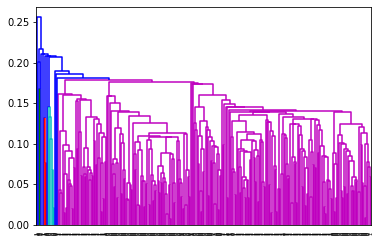

In [22]:
row_clusters = linkage(pdist(df, metric='euclidean'), method="single")
row_dendr = dendrogram(row_clusters, labels=y)
plt.show()


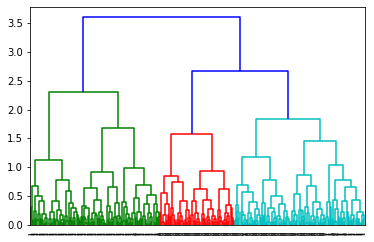

In [23]:
row_clusters = linkage(pdist(df, metric='euclidean'), method="complete")
row_dendr = dendrogram(row_clusters, labels=y)
plt.show()



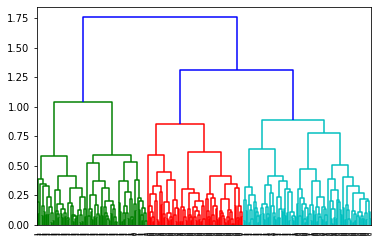

In [24]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric='euclidean'), method="average")
row_dendr = dendrogram(row_clusters, labels=y)
plt.show()

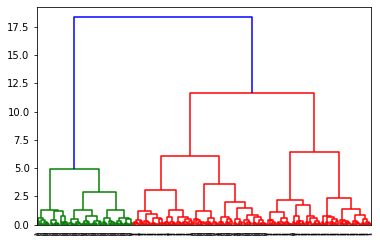

In [25]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric='euclidean'), method="ward")
row_dendr = dendrogram(row_clusters, labels=y)
plt.show()
